# Học máy

#Import thư viện

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
import nltk
import numpy as np
import matplotlib.pyplot as plt

#Đọc dữ liệu từ file exel

In [ ]:
import os
os.chdir('/content')
!git clone https://github.com/NguyenXuanVinh2000/NLP-Classifcation

fatal: destination path 'NLP-Classifcation' already exists and is not an empty directory.


In [ ]:
xl1 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/train_nor_811.xlsx')
df_train = pd.read_excel(xl1, 0)
xl2 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/test_nor_811.xlsx')
df_test = pd.read_excel(xl2, 0 )
xl3 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/valid_nor_811.xlsx')
df_valid = pd.read_excel(xl3, 0 )

#Phân chia biến độc lập X và biến phụ thuộc y

In [ ]:
X_train = df_train["Sentence"]
X_val = df_valid["Sentence"]
X_test = df_test["Sentence"]
y_train = df_train["Emotion"]
y_val = df_valid["Emotion"]
y_test = df_test["Emotion"]

#Thống kê dữ liệu

In [ ]:
print(y_train.value_counts())

Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: Emotion, dtype: int64


In [ ]:
print(y_test.value_counts())

Enjoyment    193
Disgust      132
Other        129
Sadness      116
Fear          46
Anger         40
Surprise      37
Name: Emotion, dtype: int64


In [ ]:
print(y_val.value_counts())

Enjoyment    214
Other        141
Disgust      135
Sadness       86
Anger         49
Fear          31
Surprise      30
Name: Emotion, dtype: int64


#Phân bố các nhãn của bình luận

Text(0, 0.5, 'Số lượng')

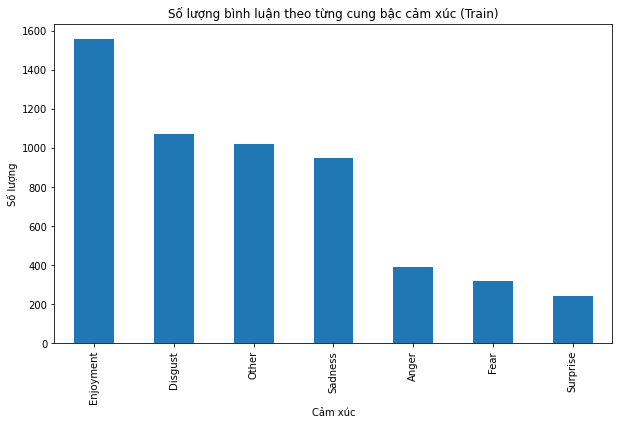

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(311)
y_train.value_counts().plot(kind='bar')
plt.title('Số lượng bình luận theo từng cung bậc cảm xúc (Train)')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

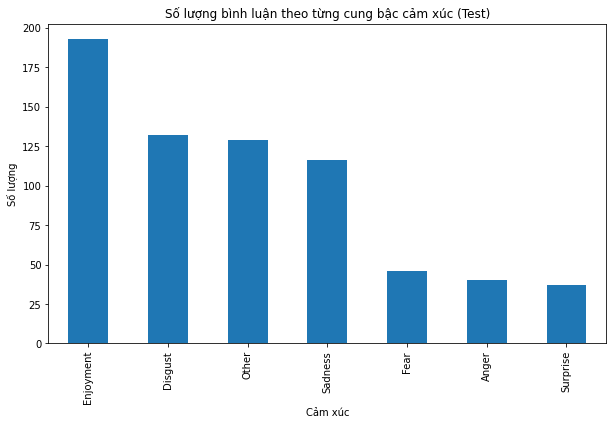

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(312)
y_test.value_counts().plot(kind='bar')
plt.title('Số lượng bình luận theo từng cung bậc cảm xúc (Test)')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

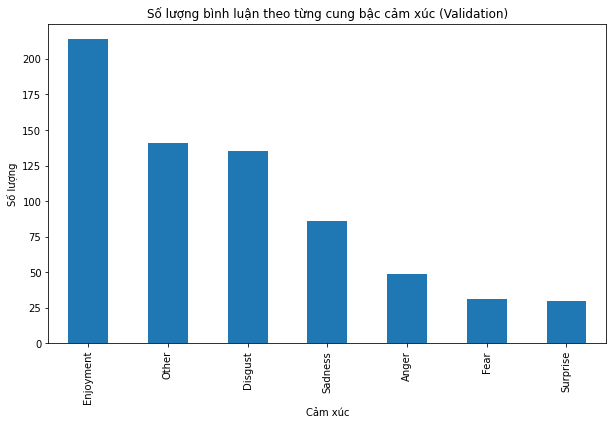

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(313)
y_val.value_counts().plot(kind='bar')
plt.title('Số lượng bình luận theo từng cung bậc cảm xúc (Validation)')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')

#Đánh số cho các nhãn có dạng “không ở dạng số”

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

#Huấn luyện model Naive Bayes

In [ ]:
my_tags =['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
val_pred = model.predict(X_val)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print('accuracy valid %s' % accuracy_score(y_val, val_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.4531024531024531
accuracy valid 0.47959183673469385
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        40
     Disgust       0.47      0.56      0.51       132
   Enjoyment       0.41      0.86      0.56       193
        Fear       0.00      0.00      0.00        46
       Other       0.49      0.29      0.36       129
     Sadness       0.65      0.32      0.43       116
    Surprise       0.00      0.00      0.00        37

    accuracy                           0.45       693
   macro avg       0.29      0.29      0.27       693
weighted avg       0.40      0.45      0.39       693



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Confusion matrix test set by Naive Bayes

[[  0  25   6   0   6   3   0]
 [  0  74  44   0  10   4   0]
 [  0  13 166   1  10   3   0]
 [  0   9  29   0   4   4   0]
 [  0  19  67   0  37   6   0]
 [  0   9  64   0   6  37   0]
 [  0   7  27   0   3   0   0]]


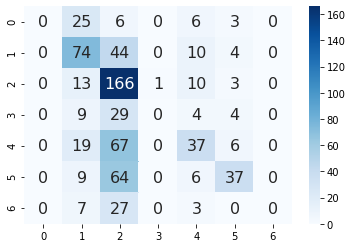

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score, recall_score, confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, fmt="g" ,cmap="Blues", annot=True,annot_kws={"size": 16})

#Confusion matrix validation set by Navie Bayes

[[  2  24  12   0   8   3   0]
 [  1  81  42   0   7   4   0]
 [  0   9 188   0  10   7   0]
 [  0   5  23   0   3   0   0]
 [  0  26  76   0  30   9   0]
 [  0   6  47   0   5  28   0]
 [  0   6  20   0   3   1   0]]


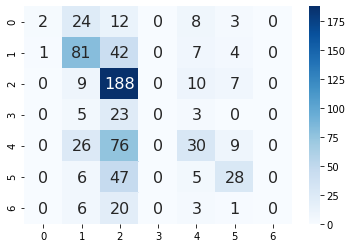

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score, recall_score, confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_val, val_pred)
print(cm)
sn.heatmap(cm, fmt="g" ,cmap="Blues", annot=True,annot_kws={"size": 16})

#Huấn luyện model Support Vector Machine

In [ ]:
my_tags =['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SVC()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
val_pred = model.predict(X_val)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print('accuracy valid %s' % accuracy_score(y_val, val_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5367965367965368
accuracy valid 0.5349854227405247
              precision    recall  f1-score   support

       Anger       0.54      0.17      0.26        40
     Disgust       0.51      0.64      0.56       132
   Enjoyment       0.51      0.73      0.60       193
        Fear       0.91      0.46      0.61        46
       Other       0.47      0.47      0.47       129
     Sadness       0.65      0.47      0.55       116
    Surprise       0.83      0.14      0.23        37

    accuracy                           0.54       693
   macro avg       0.63      0.44      0.47       693
weighted avg       0.57      0.54      0.52       693



#Confusion matrix test set by SVM

[[  7  19   4   0   7   3   0]
 [  3  84  29   1   8   7   0]
 [  1  16 140   1  26   9   0]
 [  0   8   9  21   4   4   0]
 [  0  22  40   0  60   6   1]
 [  2  12  36   0  11  55   0]
 [  0   5  15   0  11   1   5]]


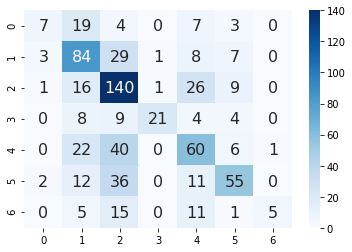

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score, recall_score, confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, fmt="g" ,cmap="Blues", annot=True,annot_kws={"size": 16})

#Confusion matrix validation by SVM

[[ 12  19   7   0   6   5   0]
 [  1  85  19   1  20   9   0]
 [  2  15 162   0  20  14   1]
 [  1   4   6  15   3   2   0]
 [  2  23  49   2  50  14   1]
 [  2   8  25   0   9  41   1]
 [  0   6  14   0   6   2   2]]


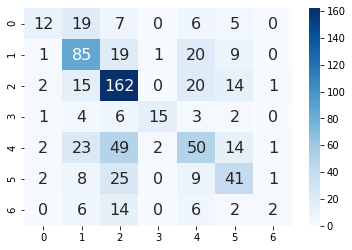

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score, recall_score, confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_val, val_pred)
print(cm)
sn.heatmap(cm, fmt="g" ,cmap="Blues", annot=True,annot_kws={"size": 16})

#Học sâu

#Import thư viện

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Input, LSTM, Bidirectional, Conv1D
from keras.layers import Dropout, Embedding
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Đọc dữ liệu

In [ ]:
X_train = df_train["Sentence"]
X_val = df_valid["Sentence"]
X_test = df_test["Sentence"]
y_train = df_train["Emotion"]
y_val = df_valid["Emotion"]
y_test = df_test["Emotion"]

# Tải model Pretrained model Word2Vec

In [ ]:
import requests
url='https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.vec.gz'
r = requests.get(url, allow_redirects=True)

open('cc.vi.300.vec.gz','wb').write(r.content)

1235219084

# extract file gzip chứa model Word2Vec

In [ ]:
import gzip

def gunzip(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)
gunzip('/content/cc.vi.300.vec.gz','/content/cc.vi.300.vec')

In [ ]:
EMBEDDING_FILE = '/content/cc.vi.300.vec'

In [ ]:
y_train=pd.get_dummies(data=y_train)
y_val=pd.get_dummies(data=y_val)
y_test=pd.get_dummies(data=y_test)

In [ ]:
y_train.head(5)

,Anger,Disgust,Enjoyment,Fear,Other,Sadness,Surprise
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


# Tiền xử lý dữ liệu

In [ ]:
max_features=2489
maxlen=150
embed_size=300

#Trích xuất đặc trưng

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features, lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(list(X_train))

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
X_val = sequence.pad_sequences(X_val, maxlen=maxlen)
print("create vector")

create vector


In [ ]:
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = tokenizer.word_index
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))

In [ ]:
for word, i in word_index.items():
    if i >= max_features:
        continue
  
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Tạo và training model với Bi-LSTM

In [ ]:
inp = Input(shape=(maxlen,))

x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=True)(inp)
x = SpatialDropout1D(0.35)(x)

x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])

out = Dense(7, activation='sigmoid')(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
batch_size = 32
epochs =5

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)
predictions = model.predict(X_test, batch_size=batch_size, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5548 samples, validate on 686 samples
Epoch 1/5
5548/5548 [==============================] - 214s 38ms/step - loss: 0.3791 - acc: 0.8539 - f1_m: 0.0627 - precision_m: 0.2489 - recall_m: 0.0432 - val_loss: 0.3204 - val_acc: 0.8717 - val_f1_m: 0.2949 - val_precision_m: 0.6792 - val_recall_m: 0.1912
Epoch 2/5
5548/5548 [==============================] - 203s 37ms/step - loss: 0.2871 - acc: 0.8823 - f1_m: 0.4316 - precision_m: 0.6916 - recall_m: 0.3212 - val_loss: 0.2867 - val_acc: 0.8796 - val_f1_m: 0.4620 - val_precision_m: 0.6314 - val_recall_m: 0.3667
Epoch 3/5
5548/5548 [==============================] - 206s 37ms/step - loss: 0.2341 - acc: 0.9032 - f1_m: 0.5914 - precision_m: 0.7459 - recall_m: 0.4949 - val_loss: 0.2861 - val_acc: 0.8853 - val_f1_m: 0.5013 - val_precision_m: 0.6596 - val_recall_m: 0.4073
Epoch 4/5
5548/5548 [==============================] - 208s 37ms/step - loss: 0.1998 - acc: 0.9183 - f1_m: 0.6738 - precision_m: 0.7828 - recall_m: 0.5956 - val_loss: 0.2845

# Đánh giá Model

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test metrics:', score)

693/693 [==============================] - 1s 2ms/step
Test metrics: [0.2804345324269965, 0.8905380964279175, 0.5707072615623474, 0.6458162665367126, 0.513731062412262]


In [ ]:
result = y_test.copy()
result[['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']] = predictions
result['Emition']=0

from sklearn.metrics import classification_report
y_pred = np.argmax(np.array(result[['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness', 'Surprise']]), axis=1)
y_pred_bool= pd.DataFrame({'Emition':y_pred})

y_pred_bool.to_csv('result.csv')
model_json = model.to_json()
with open("model_num_bc.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

print(classification_report(y_test, pd.get_dummies(data=y_pred_bool, columns=['Emition'])))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        40
           1       0.58      0.54      0.56       132
           2       0.64      0.65      0.64       193
           3       0.67      0.70      0.68        46
           4       0.50      0.50      0.50       129
           5       0.57      0.66      0.61       116
           6       0.61      0.30      0.40        37

   micro avg       0.58      0.58      0.58       693
   macro avg       0.58      0.55      0.55       693
weighted avg       0.58      0.58      0.58       693
 samples avg       0.58      0.58      0.58       693



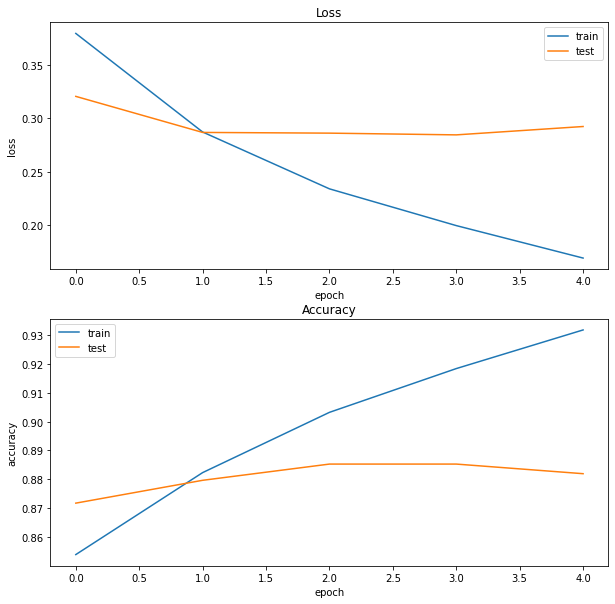

In [ ]:
# plot loss during training
plt.figure(figsize=[10,10])
plt.subplot(211)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()